# How to Plot Duolingo Data

Here is how to see your duolingo activity over time.  You can get:

* total lessons
* total points
* days active
* score for each month
* tier for each month

## How do Get your Data

You can go to https://drive-thru.duolingo.com/ and download all your Duolingo history.

It will send you a zip file.  Most of what it sends you is not useful if all you want to know is your activity over time. For example, it shows purposes plus gives you one file that is empty, friends info, etc. But those other files don't have much usefule information.

You can download this data and just import it into a spreadsheet if you don't know Python.  Then you can chart it there. For example, the data below is also in [this spreadsheet](https://docs.google.com/spreadsheets/d/1O5iMDR-Y5E_gS4Wu0sE84Rki8WrASRRamUmQhaNYNaU/edit?usp=sharing).

But if you know Python then run this notebook against that.  Adjust **folder_path** to where you unzipped your file.


In [162]:
 
import pandas as pd

df=pd.read_csv("duolingo/leaderboards.csv")


In [163]:


leaderboard=df.loc[:,['timestamp','tier','score']]
leaderboard['timestamp'] = pd.to_datetime(leaderboard['timestamp'])
leaderboard.set_index('timestamp',inplace=True)


In [164]:
pd.set_option('display.max_rows', None)


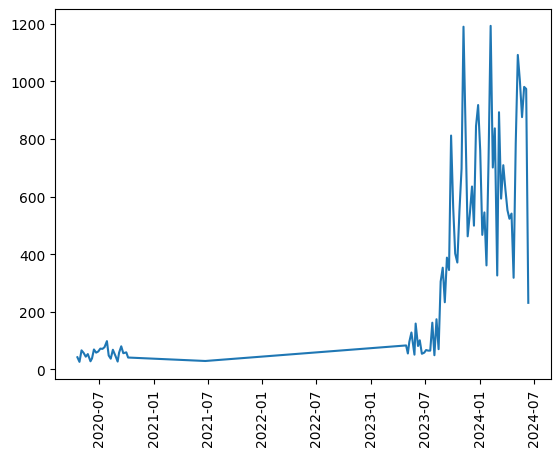

In [165]:
plt.plot(leaderboard.index,leaderboard["score"] )
plt.xticks(rotation=90)

plt.show()

In [166]:

year=leaderboard[leaderboard.index.year > 2022]
 

In [168]:
lang= pd.read_csv("duolingo/languages.csv")
lang.transpose()

,0
learning_language,el
from_language,en
points,30603
skills_learned,0
total_lessons,652
days_active,372
last_active,2024-06-11 10:56:49
prior_proficiency,NaN
subscribed,NaN


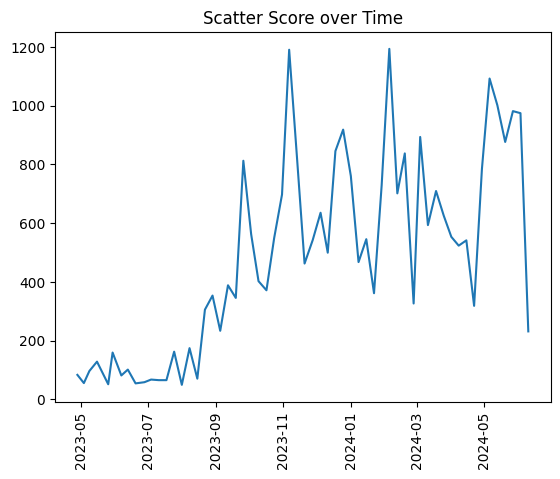

In [180]:
plt.plot(year.index,year["score"] )
plt.title("Scatter Score over Time")
plt.xticks(rotation=90)

plt.show()

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_6479/1375532780.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (index, value) in enumerate(df['tier'].iteritems()):


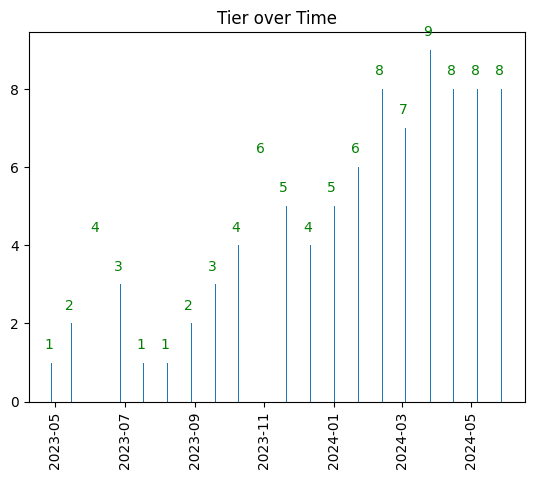

In [178]:
# take every 3 measurement so chart is not too crowded
import matplotlib.pyplot as plt

df=year.iloc[::3]


# Create a bar plot
plt.bar(df.index, df['tier'])
plt.title("Tier over Time")

# Annotate every 10th x-value
for i, (index, value) in enumerate(df['tier'].iteritems()):
    plt.annotate(int(value), (index, value), xytext=(-5, 10), 
                     textcoords='offset points',
                     color='green')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_6479/2394201085.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (index, value) in enumerate(df['score'].iteritems()):


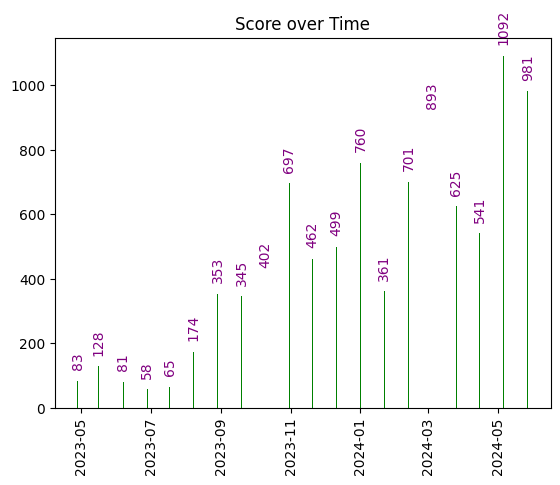

In [179]:
# Create a bar plot

 

plt.bar(df.index, df['score'],color='green')

plt.title("Score over Time")

# Annotate every 10th x-value
for i, (index, value) in enumerate(df['score'].iteritems()):
    plt.annotate(int(value), (index, value), xytext=(-5, 10), 
                     textcoords='offset points',
                     color='purple', rotation=90)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()